## Setup Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Mount Google Drive - applicable, if working on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set Working Directory - if working on Google Drive
%cd /content/drive/MyDrive/Colab\ Notebooks/219\ Final\ Project

# # Set Working Directory - if working on Local Machine
# import os
# os.chdir('/Users//replace_me')

/content/drive/MyDrive/Colab Notebooks/219 Final Project


## Load Dataset

In [4]:
# Import the datasets
true_data = pd.read_csv('a1_True.csv')
fake_data = pd.read_csv('a2_Fake.csv')

# Create new 'Target' column in both 'true_data' and 'fake_data' datasets indicating whether data is True or Fake
true_data['Target'] = ['True']*len(true_data)
fake_data['Target'] = ['Fake']*len(fake_data)

# Combine 'true_data' and 'fake_data' into a single DataFrame called 'data', ensuring randomness in the order of rows
data = true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])

# Display the size and preview the first few rows of the newly created DataFrame

print(data.shape)
data.head()

(44898, 5)


<ipython-input-4-64c960606008>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])


,title,text,subject,date,Target
0,"Trump’s Favorability Rating Hits Historic, Re...",Americans are waking up. After being promised ...,News,"January 16, 2017",Fake
1,Republican U.S. Senator Cochran postpones retu...,WASHINGTON (Reuters) - Republican Senator Thad...,politicsNews,"October 16, 2017",True
2,NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...,Socialism doesn t work but I guess Venezuela d...,politics,"Apr 6, 2015",Fake
3,Snowflake Alert: Kellyanne Conway Says Anders...,White House counselor Kellyanne Conway is offe...,News,"May 11, 2017",Fake
4,Trump signs memo directing Pentagon to impleme...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 25, 2017",True


In [5]:
# Change True/Fake into to numbers 0/1 (Fake=1)
data['label'] = pd.get_dummies(data.Target)['Fake']

In [6]:
data.head()

,title,text,subject,date,Target,label
0,"Trump’s Favorability Rating Hits Historic, Re...",Americans are waking up. After being promised ...,News,"January 16, 2017",Fake,1
1,Republican U.S. Senator Cochran postpones retu...,WASHINGTON (Reuters) - Republican Senator Thad...,politicsNews,"October 16, 2017",True,0
2,NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...,Socialism doesn t work but I guess Venezuela d...,politics,"Apr 6, 2015",Fake,1
3,Snowflake Alert: Kellyanne Conway Says Anders...,White House counselor Kellyanne Conway is offe...,News,"May 11, 2017",Fake,1
4,Trump signs memo directing Pentagon to impleme...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 25, 2017",True,0


([<matplotlib.patches.Wedge at 0x7f1cad1808b0>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

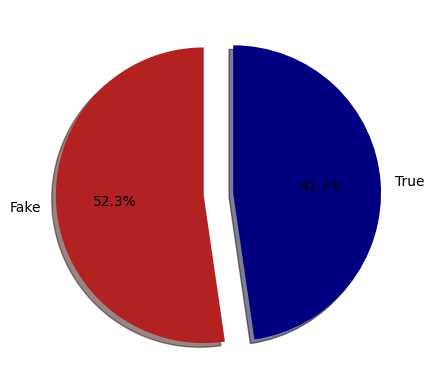

In [7]:
# Checking if our data balanced
label_size = [data['label'].sum(),len(data['label'])-data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

## Text Lemmazation

In [8]:
import pandas as pd
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
wnl = WordNetLemmatizer()

def clean(text):
    """Clean the input text."""
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"", texter)
    texter = re.sub('&#39;', "'", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u ', " you ", texter)
    texter = re.sub('`', "", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", "!", texter)
    texter = re.sub(r"(\?)\1+", "?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ', texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    return texter if texter else ""

def penn2morphy(penntag):
    """Converts Penn Treebank tags to WordNet."""
    morphy_tag = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    """Lemmatize a sentence."""
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(list_word)]

analyzer = CountVectorizer().build_analyzer()

def lemm_rmv_punc(doc):
    """Clean, Lemmatize and remove punctuation from a document."""
    doc = clean(doc)
    return ' '.join(word for word in lemmatize_sent(analyzer(doc)))




In [9]:
# Download nltk packages
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Check lemmatization performance
data["text"][1]

'WASHINGTON (Reuters) - Republican Senator Thad Cochran has delayed his return to Washington following a medical procedure, his office said on Monday, possibly complicating passage of a budget blueprint that is needed to push through the Republicans’ plan for tax reform. “After a day of monitoring his condition, and on the advice of his physicians and other health care professionals, Senator Cochran has postponed his return to Washington,” said Brad White, chief of staff for the Mississippi legislator. “The senator has expressed his intention to return to the Senate when his health permits, and to fulfill his commitment and duties to the people of his state,” White said in a statement. The Senate is trying this week to pass a partisan budget blueprint that would help guide federal spending. Republicans hold a 52-48 majority in the Senate. If Cochran is not present for votes, Republicans could afford to lose no more than one other vote, assuming all 46 Democrats and two independents opp

In [11]:
# After-processing result
lemm_rmv_punc(data["text"][1])

'washington reuters republican senator thad cochran have delay his return to washington follow medical procedure his office say on monday possibly complicate passage of budget blueprint that be need to push through the republican plan for tax reform after day of monitor his condition and on the advice of his physician and other health care professional senator cochran have postpone his return to washington say brad white chief of staff for the mississippi legislator the senator have express his intention to return to the senate when his health permit and to fulfill his commitment and duty to the people of his state white say in statement the senate be try this week to pass partisan budget blueprint that would help guide federal spending republican hold 52 48 majority in the senate if cochran be not present for vote republican could afford to lose no more than one other vote assume all 46 democrat and two independent oppose the budget measure in addition to sketch out overall spending l

In [12]:
from tqdm import tqdm

# tqdm integration with pandas
tqdm.pandas()

# Apply lemmatization
data['cleaned_title'] = data['title'].progress_apply(lemm_rmv_punc)

100%|██████████| 44898/44898 [00:36<00:00, 1228.59it/s]


In [13]:
data['cleaned_text'] = data['text'].progress_apply(lemm_rmv_punc)

100%|██████████| 44898/44898 [10:41<00:00, 69.95it/s]


In [14]:
data.head()

,title,text,subject,date,Target,label,cleaned_title,cleaned_text
0,"Trump’s Favorability Rating Hits Historic, Re...",Americans are waking up. After being promised ...,News,"January 16, 2017",Fake,1,trump favorability rating hit historic record low,american be wake up after be promise trump wou...
1,Republican U.S. Senator Cochran postpones retu...,WASHINGTON (Reuters) - Republican Senator Thad...,politicsNews,"October 16, 2017",True,0,republican senator cochran postpones return to...,washington reuters republican senator thad coc...
2,NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...,Socialism doesn t work but I guess Venezuela d...,politics,"Apr 6, 2015",Fake,1,no toilet paper socialism be in it final stage...,socialism doesn work but guess venezuela didn ...
3,Snowflake Alert: Kellyanne Conway Says Anders...,White House counselor Kellyanne Conway is offe...,News,"May 11, 2017",Fake,1,snowflake alert kellyanne conway say anderson ...,white house counselor kellyanne conway be offe...
4,Trump signs memo directing Pentagon to impleme...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 25, 2017",True,0,trump sign memo direct pentagon to implement t...,washington reuters president donald trump sign...


In [15]:
# Store the value
data.to_csv("full_dataset_with_text.csv")

### Prepare Input Data

In [17]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['cleaned_text'], data['label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=data['Target'])
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

Text(0, 0.5, 'Number of texts')

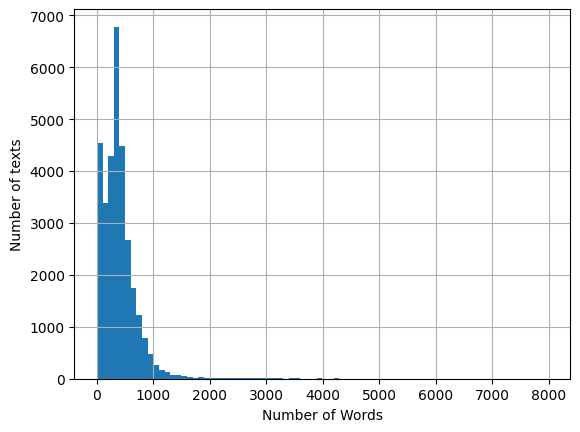

In [22]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 80)
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [19]:
np.mean(seq_len)

396.430412371134

In [20]:
np.std(seq_len)

352.3661349380215

In [ ]:
## Let's do 500